Firstly, we needed to know the light intensity with respect to the diffraction of the laser beam. This would allow us to know exactly how much we could diffract the laser beam by, while still maintaining the visibility of the laser beam under daylight.

For this reason, we decided to use the diffraction grating formula. This formula allows us to work out what the wavelength is given the slit separation, the order and the angle between the orders: $$\lambda=\frac{dsin(\theta)}{n}$$

We then rearranged the formula so we could find the optimal value for $n$.

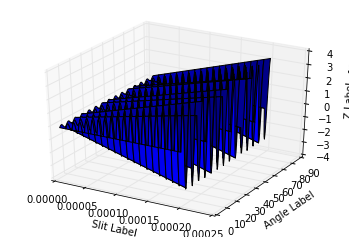

In [4]:
%matplotlib inline
import numpy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def getN(d, t, wave_length=650): 
    return d*numpy.sin(t)/wave_length # The actual result


# Plot type
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Axes arrays (range)
D = numpy.arange(1/100000,1/5000, 1/1000000) # From 5m to 10m
T = numpy.arange(0, 90, 0.5) # From 30cm to 50cm
D, T = np.meshgrid(D, T)

zs = np.array([getN(d,t) for d,t in zip(np.ravel(D), np.ravel(T))])
Z = zs.reshape(D.shape)

ax.plot_surface(D, T, Z)

ax.set_xlabel('Slit Label')
ax.set_ylabel('Angle Label')
ax.set_zlabel('Z Label')

plt.show()

From the graph above, we ca see that the value for $n$ varies quite a lot with respect to the slit separation and the angle $\theta$. From this we decided to test the diffraction grating in the lab, since there are multiple optimal values for $\theta$ and $d$.

We then decided to look at the cost of the components. Each 5mW 650nm laser beam costs about \$5.69 (less than £5.00). With this in mind, we managed to come up with a formula to work out how many lasers we'll need to cover a certain area (blind spot) - this depends on the size of the blind zone of the lorry: $$N=A/0.72$$ Where $A=W*H$ is the desired area (depends on the lorry's blind zone) and $0.72$ is the area covered by a single laser.

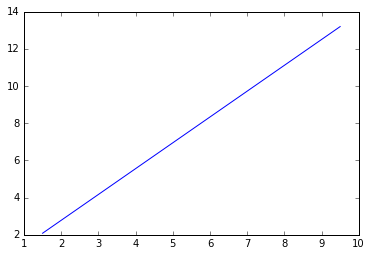

Number of lasers needed to cover 7x1m: 9.722222222222223
The cost for all the lasers: 48.611111111111114


In [13]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def graph(function, w_range, h_range):
    y = np.array([function(w, h) for w in w_range for h in h_range])
    x = np.array([(w*h) for w in w_range for h in h_range])
    plt.plot(x, y)  
    plt.show()
    
def getN(w, h):
    # Just doing the formula above
    return w*h/0.72

def getPrice(n, laser_price=5):
    return n*laser_price;
    

W = np.arange(5,15, 50) # From 5m to 15m
H = np.arange(0.3, 2, 0.1) # From 30cm to 200cm

graph(getN, W, H)
print("Number of lasers needed to cover 7x1m: " + str(getN(7,1))) # Price of our chose dimension
print("The cost for all the lasers: "+str(getPrice(getN(7,1))))

In conclusion, using the function for calculating the number of lasers needed to cover a specific area, we could calculate the cost of the lasers needed for our product. With each laser costing less than five pounds each, we estimate that the whole project will cost about £60.00 as we need £48.61 for lasers and about £10.00 for wiring and plastic to wrap up the components.  